In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

Load the data.

In [2]:
whiskies = (
    pd.read_csv('../whiskies.txt')
    .pipe(lambda x: x.assign(Postcode = x.Postcode.str.strip()))
)

In [3]:
whiskies.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140


In [4]:
# These are the dimensions that each whisky is scored on.

dimensions = [
    'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral'
]

Checking correlations between the whiskies.

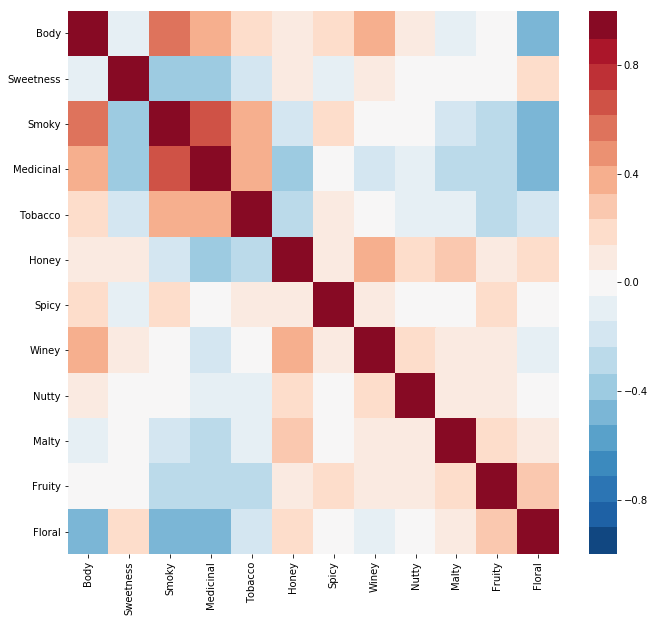

In [5]:
fig, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(
    whiskies[dimensions].corr(),
    xticklabels=dimensions,
    yticklabels=dimensions,
    ax=ax,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.color_palette('RdBu_r', 21)
);

Performing a factor analysis to even out the effects of correlations.

In [6]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=6)

factors = pd.DataFrame(fa.fit_transform(whiskies[dimensions]))

Take a little look around in the components to see that they kind of make sense.

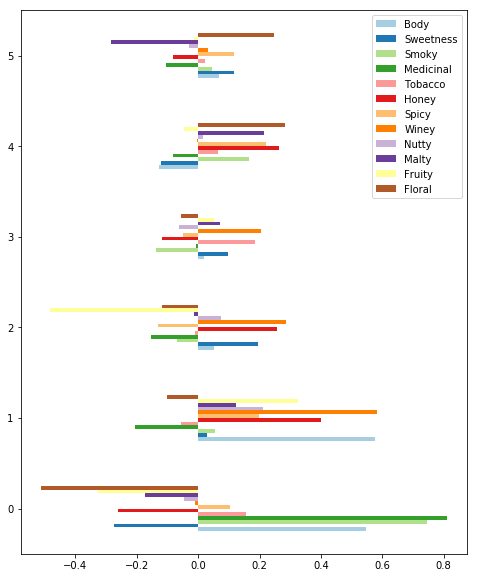

In [7]:
factor_loadings = (
    pd.DataFrame(data=fa.components_)
)

dimension_cmap = sns.color_palette('Paired', n_colors=len(dimensions))

factor_loadings.columns = dimensions

factor_loadings.plot(color=dimension_cmap, kind='barh', figsize=(8, 10))

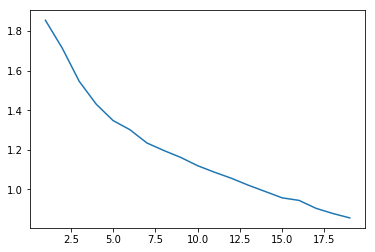

In [8]:
# https://pythonprogramminglanguage.com/kmeans-elbow-method/

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(factors)
    distortions.append(sum(np.min(cdist(factors, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / factors.shape[0])


plt.plot(K, distortions)

In [9]:
N = 9


km = KMeans(n_clusters=N, random_state=0, init='k-means++').fit(factors)

In [10]:
whiskies['cluster'] = km.labels_

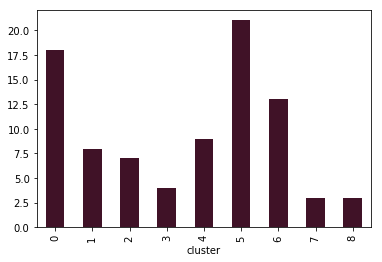

In [11]:
whiskies.groupby('cluster').apply(len).plot(kind='bar', color='#401227')

In [12]:
whiskies.query('cluster==0')

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,cluster
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680,0
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570,0
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140,0
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,AB55 3XS,340754,848623,0
11,12,Belvenie,3,2,1,0,0,3,2,1,0,2,2,2,AB55 4DH,332680,840840,0
14,15,Benrinnes,3,2,2,0,0,3,1,1,2,3,2,2,AB38 9NN,325800,839920,0
15,16,Benromach,2,2,2,0,0,2,2,1,2,2,2,2,IV36 3EB,303330,859350,0
17,18,BlairAthol,2,2,2,0,0,1,2,2,2,2,2,2,PH16 5LY,294860,757580,0
29,30,Deanston,2,2,1,0,0,2,1,1,1,3,2,1,FK16 6AG,271570,701570,0
31,32,Edradour,2,3,1,0,0,2,1,1,4,2,2,2,PH16 5JP,295960,757940,0


In [13]:
(
    whiskies
    [dimensions + ['cluster']]
    .groupby('cluster')
    .agg(np.mean).T
)

cluster,0,1,2,3,4,5,6,7,8
Body,2.277778,2.500,1.714286,3.50,3.555556,1.095238,1.923077,1.666667,2.000000
Sweetness,2.444444,1.750,3.000000,1.50,2.222222,2.142857,2.538462,2.333333,2.333333
Smoky,1.277778,2.625,1.000000,3.75,1.777778,1.047619,1.461538,1.666667,1.333333
Medicinal,0.055556,2.125,0.142857,3.25,0.111111,0.238095,0.384615,0.333333,1.000000
Tobacco,0.000000,0.000,0.000000,1.00,0.000000,0.000000,0.000000,1.000000,1.000000
Honey,1.888889,1.125,1.142857,0.00,1.777778,1.238095,0.615385,1.666667,0.333333
Spicy,1.555556,1.625,0.714286,1.25,1.666667,1.047619,1.615385,1.666667,1.666667
Winey,1.555556,0.500,0.714286,0.75,2.444444,0.380952,0.538462,1.333333,1.000000
Nutty,1.888889,1.500,1.142857,1.25,1.888889,1.190476,1.384615,1.333333,1.000000
Malty,2.388889,1.625,1.428571,1.00,1.666667,2.000000,1.153846,2.333333,2.000000


-----

What about doing the clustering without a PCA first?


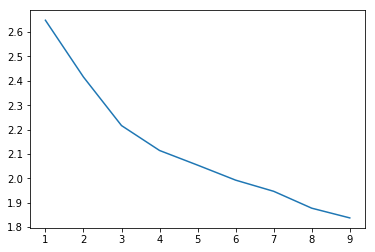

In [14]:
whisky_scores = whiskies[dimensions]

distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(whisky_scores)
    distortions.append(sum(np.min(cdist(whisky_scores, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / whisky_scores.shape[0])

    
plt.plot(K, distortions)

In [15]:
km = KMeans(n_clusters=N, random_state=0, init='k-means++').fit(whisky_scores)

whiskies['plain_cluster'] = km.labels_

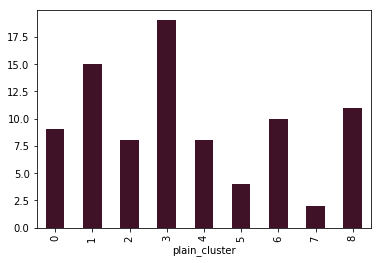

In [16]:
whiskies.groupby('plain_cluster').apply(len).plot(kind='bar', color='#401227')

In [17]:
(
    whiskies
    [dimensions + ['plain_cluster']]
    .groupby('plain_cluster')
    .agg(np.mean).T
)

plain_cluster,0,1,2,3,4,5,6,7,8
Body,1.555556,2.200000,1.875,1.157895,3.375,3.50,1.9,4.0,2.363636
Sweetness,3.111111,2.000000,1.625,2.157895,2.375,1.50,2.6,1.5,2.818182
Smoky,1.111111,1.600000,2.250,0.894737,1.750,3.50,1.6,4.0,1.000000
Medicinal,0.333333,0.066667,1.750,0.157895,0.125,3.00,0.5,4.0,0.000000
Tobacco,0.111111,0.133333,0.125,0.000000,0.000,0.50,0.2,1.0,0.000000
Honey,1.333333,1.800000,1.250,1.000000,1.625,0.25,0.3,0.0,2.000000
Spicy,1.111111,1.400000,1.375,0.789474,1.625,2.25,2.0,0.5,1.727273
Winey,0.777778,1.066667,0.750,0.368421,2.750,0.00,0.4,1.5,1.727273
Nutty,0.888889,2.133333,1.750,1.210526,1.875,1.25,1.3,1.0,1.272727
Malty,1.666667,2.333333,1.625,1.947368,1.625,1.50,1.3,1.0,1.909091


In [20]:
whiskies.query('plain_cluster == 7')

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,cluster,plain_cluster
57,58,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,PA42 7DZ,140430,645730,3,7
58,59,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,PA42 7DU,138680,645160,3,7


I've been playing around with this, it becomes quite interesting.

When doing the factor analysis, one thing that happens is that the tobacco flavour starts to become highly discriminating. It really pulls clusters apart, and you get about 3 clusters which are similar to other clusters but just with a tobacco flavour in them.

Removing the factor analysis, and bumping up the number of clusters, seems to give pretty interesting results.

In [19]:
(
    whiskies
    .drop('cluster', axis=1)
    .rename(columns={'plain_cluster': 'cluster'})
).to_csv('../whisky-clusters.csv', index=False, encoding='utf-8')
